In [1]:
# This line configures matplotlib to show figures embedded in the notebook.
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Update the matplotlib configuration parameters:
import matplotlib
matplotlib.rcParams.update({'font.size': 22, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

In [3]:
default = pd.read_csv("default1.csv")
default.head()

,ID,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879


In [4]:
default[['balance', 'student', 'default']].groupby(['student', 'default']).describe()

balance                                                     \
                  count         mean         std          min          25%   
student default                                                              
No      No       6850.0   744.504450  445.515133     0.000000   407.793662   
        Yes       206.0  1678.429505  330.914055   652.397134  1480.710533   
Yes     No       2817.0   948.480210  450.553664     0.000000   640.364464   
        Yes       127.0  1860.379092  328.735594  1013.216886  1637.590285   

                                                        
                         50%          75%          max  
student default                                         
No      No        742.067341  1061.206408  2391.007739  
        Yes      1709.914407  1912.424549  2499.016750  
Yes     No        953.130545  1260.494009  2388.174009  
        Yes      1889.332110  2110.278126  2654.322576

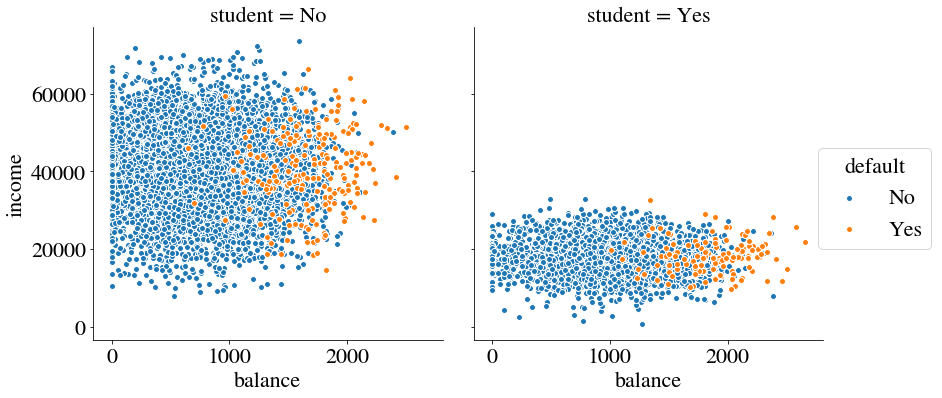

In [5]:
g = sns.FacetGrid(default, col="student",  hue="default", size=6)
g = (g.map(plt.scatter, "balance", "income", edgecolor="w").add_legend())

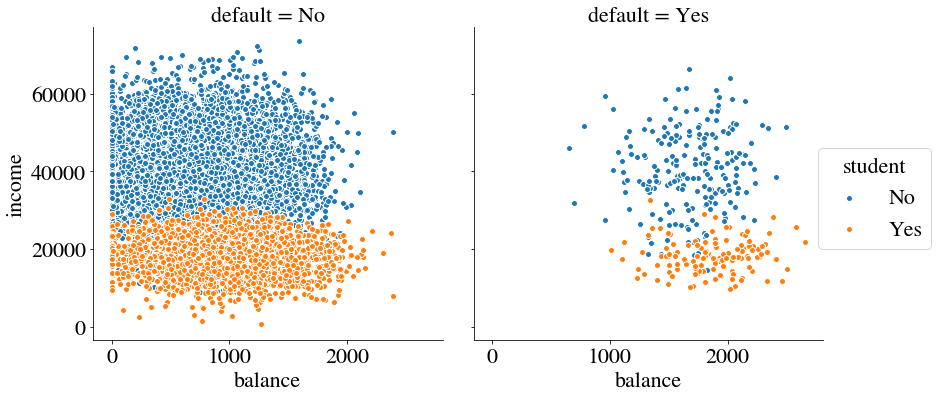

In [6]:
g = sns.FacetGrid(default, col="default",  hue="student", size=6)
g = (g.map(plt.scatter, "balance", "income", edgecolor="w").add_legend())

22.0

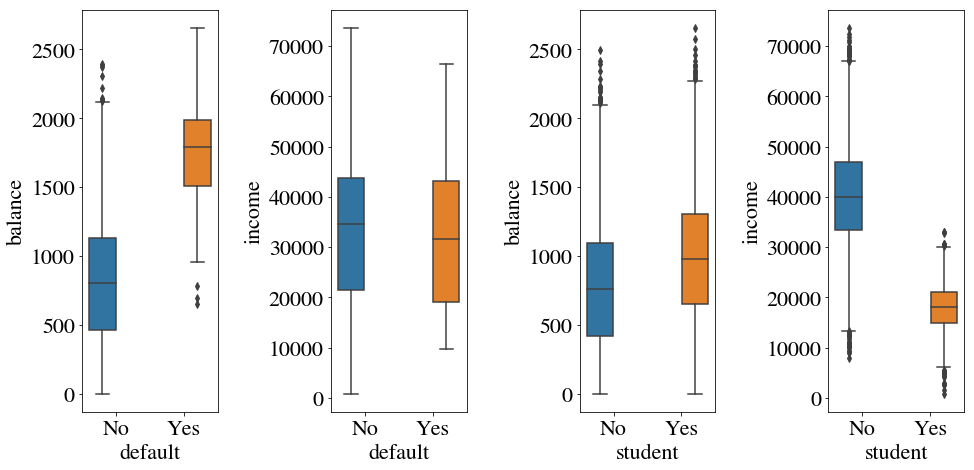

In [7]:
fig, axes = plt.subplots(1, 4, figsize=(14,7))
sns.boxplot(x='default', y='balance', data=default, hue='default', ax=axes[0]).legend_.remove()
sns.boxplot(x='default', y='income', data=default, hue='default', ax=axes[1]).legend_.remove()
sns.boxplot(x='student', y='balance', data=default, hue='student', ax=axes[2]).legend_.remove()
sns.boxplot(x='student', y='income', data=default, hue='student', ax=axes[3]).legend_.remove()
fig.tight_layout()
matplotlib.rcParams['font.size']

In [8]:
default['default'] = default['default'].replace(['Yes'],1)
default['default'] = default['default'].replace(['No'],0)
default['student'] = default['student'].replace(['Yes'],1)
default['student'] = default['student'].replace(['No'],0)

#data.loc[data["default"]=="No", "default"]=0
#data.loc[data["default"]=="Yes", "default"]=1

See: [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression)


In [9]:
# Qualitative logistic regression
lr = LogisticRegression()
X = default['student'][:, np.newaxis]
y = default['default']
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train, X_test, y_train, y_test = X, X, y, y
lr.fit(X_train, y_train)
print("What is the association between being a student and the probability of default? \
Predictor is student (yes) and target is default.")
print("The beta_1 coefficient for student (yes) is", lr.coef_[0][0], ". As a positive number, \
it indicates that students have a higher probability of default than non-students.")
b0 = lr.intercept_[0]
b1 = lr.coef_[0][0]
print("(Intercept, Coefficient) = (%0.04f, %0.04f) " % (b0, b1))
print("Model Score is", lr.score(X_test, y_test))

# Predicting default probabilities
# Probabilities for each of the classes, No Default and Yes Default, for students, 
# returned by .predict_proba in order predict default for students
print("Predict Probability of No Default and Yes Default, in that order, for a student: ", 
        lr.predict_proba(0), lr.predict_proba(1))
print("What is the probability of default given that the individual is NOT a student?  %.02f%%" %
        (lr.predict_proba(0)[0,1]*100))
print("What is the probability of default given that the individual is a student? %.02f%%" % 
        (lr.predict_proba(1)[0,1]*100))

What is the association between being a student and the probability of default? Predictor is student (yes) and target is default.
The beta_1 coefficient for student (yes) is 0.38256902529040543 . As a positive number, it indicates that students have a higher probability of default than non-students.
(Intercept, Coefficient) = (-3.4850, 0.3826) 
Model Score is 0.9667
Predict Probability of No Default and Yes Default, in that order, for a student:  [[0.97025686 0.02974314]] [[0.95699136 0.04300864]]
What is the probability of default given that the individual is NOT a student?  2.97%
What is the probability of default given that the individual is a student? 4.30%


0.14845812561562863
0.20493721090989747
0.029743137630008024
0.04300863823932743


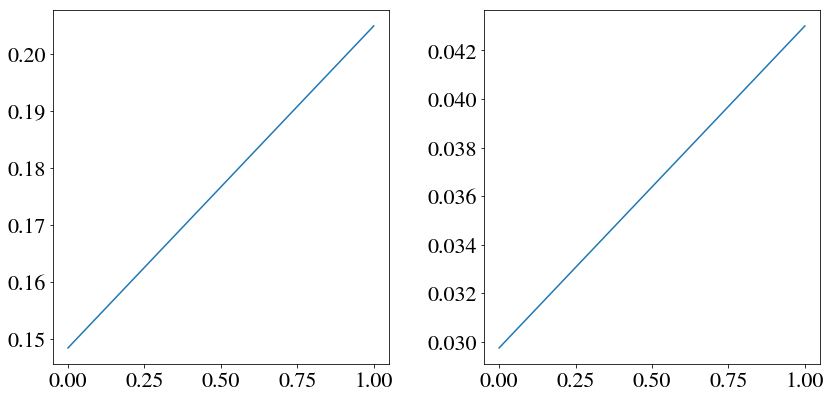

In [10]:
fig, ax = plt.subplots(1,2, figsize=(12,6))

def model(x):
    return 1 / (1 + np.exp(-x))
data150loss = model(X_test * 0.39102829245505394 + -1.74674574).ravel()
print(model(0 * 0.39102829245505394 + -1.74674574))
print(model(1 * 0.39102829245505394 + -1.74674574))
ax[0].plot(X_test, data150loss)

loss = model(X_test * lr.coef_ + lr.intercept_).ravel()
print(model(0 * b1 + b0))
print(model(1 * b1 + b0))
ax[1].plot(X_test, loss)
fig.tight_layout()

In [11]:
# Multivariable logistic regression
lr = LogisticRegression()
X = default[['balance', 'student']]
y = default['default']
lr.fit(X, y)
print("What is the association between balance and being a student and the probability of default?")
print("Model Score is ", lr.score(X, y))
print("The beta_1 coefficient for predictor balance is", lr.coef_[0,0])
print("The beta_2 coefficient for predictor student (yes) is", lr.coef_[0,1], ". As a negative number, it indicates \n    that students have a lower probability of default than non-students when the balance is taken into account.")
# Predicting default probabilities
# predict default for a student with a balance of $1500
print("What is the probability of default for a student with a balance of $1500?", lr.predict_proba([[1500,1]])[0,1])
# predict default for a NON-student with a balance of $1500
print("What is the probability of default for a non-student with a balance of $1500?", lr.predict_proba([[1500,0]])[0,1])

What is the association between balance and being a student and the probability of default?
Model Score is  0.9729
The beta_1 coefficient for predictor balance is 0.004967018733841842
The beta_2 coefficient for predictor student (yes) is -0.6370044464878946 . As a negative number, it indicates 
    that students have a lower probability of default than non-students when the balance is taken into account.
What is the probability of default for a student with a balance of $1500? 0.0636135283153434
What is the probability of default for a non-student with a balance of $1500? 0.11383050574346325
